In [11]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv

In [12]:
df_1= pd.read_csv('coinbase_Part1.csv')
df_1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [13]:
df_2 = pd.read_csv('coinbase_Part2.csv')
df_2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1480913100,758.00,758.11,758.00,758.11,5.08115,3852.061200,758.108145
1,1480913160,758.12,758.20,758.12,758.13,5.76837,4373.355968,758.161485
2,1480913220,758.18,758.18,758.00,758.18,2.20489,1671.407708,758.045847
3,1480913280,758.08,758.08,758.08,758.08,2.44986,1857.189869,758.080000
4,1480913340,758.19,758.20,758.19,758.20,1.39213,1055.512856,758.199921


In [14]:
frames = [df_1, df_2]
df = pd.concat(frames, ignore_index=True)
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1819070,1530057360,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990
1819071,1530057420,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687
1819072,1530057480,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515
1819073,1530057540,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271
1819074,1530057600,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960


In [15]:
# change time zone to UTC -0
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC')
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1819070,2018-06-26 23:56:00+00:00,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990
1819071,2018-06-26 23:57:00+00:00,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687
1819072,2018-06-26 23:58:00+00:00,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515
1819073,2018-06-26 23:59:00+00:00,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271
1819074,2018-06-27 00:00:00+00:00,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960


In [16]:
#Convert Timestamp into separate Date and Time
#temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects

df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
1819070,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990,2018-06-26,23:56:00+00:00
1819071,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687,2018-06-26,23:57:00+00:00
1819072,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515,2018-06-26,23:58:00+00:00
1819073,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271,2018-06-26,23:59:00+00:00
1819074,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960,2018-06-27,00:00:00+00:00


In [17]:
price=df['Close']

In [18]:
# calculate rolling average and standard deviation in one day period

min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1819070,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990,2018-06-26,23:56:00+00:00,6950.466007,116102.541286,558.598612
1819071,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687,2018-06-26,23:57:00+00:00,6950.436759,116105.160854,558.611216
1819072,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515,2018-06-26,23:58:00+00:00,6950.407581,116107.757433,558.623708
1819073,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271,2018-06-26,23:59:00+00:00,6950.378122,116110.388868,558.636369
1819074,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960,2018-06-27,00:00:00+00:00,6950.348583,116113.035307,558.649102


In [19]:
# select study dates range
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('04/27/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('06/27/18', '%x'))].index[0]

df_3= df.loc[index_1:index_2]

df_3.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1731234,9272.12,9283.73,9272.12,9283.73,5.521535,51243.692380,9280.697386,2018-04-27,00:00:00+00:00,7723.059642,174374.112840,838.957842
1731235,9283.72,9283.73,9283.72,9283.73,1.436038,13331.790114,9283.728082,2018-04-27,00:01:00+00:00,7723.094150,174381.082787,838.991376
1731236,9283.73,9284.37,9272.11,9279.29,16.076129,149209.967360,9281.461112,2018-04-27,00:02:00+00:00,7723.128925,174388.018156,839.024744
1731237,9279.30,9279.30,9265.00,9265.01,24.078610,223219.434130,9270.445204,2018-04-27,00:03:00+00:00,7723.163069,174394.821616,839.057477
1731238,9265.00,9265.01,9263.00,9263.00,10.381326,96172.591043,9263.998692,2018-04-27,00:04:00+00:00,7723.197035,174401.604503,839.090111


In [20]:
df_4=df_3.groupby(df_3.Date).mean()
df_4.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2018-04-27,9212.924229,9215.354361,9209.900840,9212.623146,8.071523,74139.102397,9212.626281,7745.497282,178902.461269,860.744868
2018-04-28,9236.517090,9238.954771,9234.126597,9236.833299,6.060540,56034.330604,9236.521288,7792.066903,186626.677734,897.908022
2018-04-29,9344.710021,9346.723174,9342.532194,9344.712750,5.377127,50329.048605,9344.563595,7864.628485,193158.244455,929.333037
2018-04-30,9283.317285,9285.052444,9281.329611,9283.216535,5.962281,55314.436833,9283.211680,7943.933612,196941.104101,947.533329
2018-05-01,8987.351660,8989.336215,8985.170090,8987.233125,7.817025,70218.867655,8987.231689,8017.308907,197652.354189,950.955332


In [21]:
# find date have average change larger than 4 times sd change
marker=[]
avechange=[]
sdchange=[]
for i in range(len(df_4)-1):
    avediff=(df_4['Average'].iloc[i+1]-df_4['Average'].iloc[i])/df_4['Average'].iloc[i]
    sddiff=(df_4['SD'].iloc[i+1]-df_4['SD'].iloc[i])/df_4['SD'].iloc[i]
    avechange.append(avediff)
    sdchange.append(sddiff)
   # if abs(avechange[i]) > 4*(df_4['SD'].iloc[i]):
    if abs(avechange[i]) > 4*(sdchange[i]):
        marker.append(df_4.index[i])   

In [22]:
marker

[datetime.date(2018, 5, 1),
 datetime.date(2018, 5, 4),
 datetime.date(2018, 5, 5),
 datetime.date(2018, 5, 6),
 datetime.date(2018, 5, 7),
 datetime.date(2018, 5, 8),
 datetime.date(2018, 5, 9),
 datetime.date(2018, 5, 10),
 datetime.date(2018, 5, 11),
 datetime.date(2018, 5, 12),
 datetime.date(2018, 5, 13),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 5, 15),
 datetime.date(2018, 5, 16),
 datetime.date(2018, 5, 17),
 datetime.date(2018, 5, 18),
 datetime.date(2018, 6, 1),
 datetime.date(2018, 6, 2),
 datetime.date(2018, 6, 3),
 datetime.date(2018, 6, 4),
 datetime.date(2018, 6, 5),
 datetime.date(2018, 6, 6),
 datetime.date(2018, 6, 7),
 datetime.date(2018, 6, 8),
 datetime.date(2018, 6, 9),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 6, 19),
 datetime.date(2018, 6, 20),
 datetime.date(2018, 6, 21)]

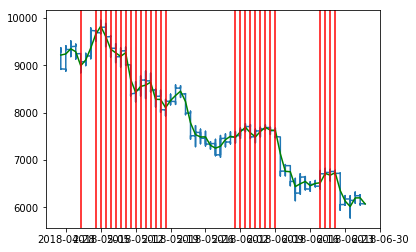

In [23]:
plt.plot(df_3.Date,df_3.Weighted_Price)
plt.plot(df_4.index,df_4.Weighted_Price,c='g')
for xc in marker:
    plt.axvline(x=xc,c='r')
plt.show()

In [24]:
df = pd.DataFrame({'Date':marker})
df.to_csv('marker_4SD.csv',index=False)